<a href="https://colab.research.google.com/github/shahin28jan/X-ray-Prediction/blob/main/covid_chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.


In [3]:
import os # Operating System
import cv2 # OpenCV --> library for image manipulation like change color to black and white, crop, etc
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # Library untuk animasi loading

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

loading data from kaggle

In [4]:
!mkdir -p ~/ .kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

chest-xray-covid19-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzipping the data

In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-covid19-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

X-ray of a covid patient

(256, 256, 3)


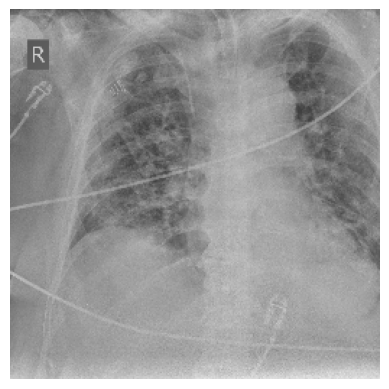

In [10]:
img=cv2.imread("/content/Data/train/COVID19/COVID19(0).jpg")
img=cv2.resize(img,[256,256])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

Read data and converting into array

In [11]:
#Train Data
Covidlist_train=os.listdir("/content/Data/train/COVID19")
Normallist_train=os.listdir("/content/Data/train/NORMAL")
Viral_Pneumonialist_train=os.listdir("/content/Data/train/PNEUMONIA")

#Test Data
Covidlist_test=os.listdir("/content/Data/test/COVID19")
Normallist_test=os.listdir("/content/Data/test/NORMAL")
Viral_Pneumonialist_test=os.listdir("/content/Data/test/PNEUMONIA")

In [12]:
x=list()
y=list()
for i in Normallist_train:
    img=cv2.imread("/content/Data/train/NORMAL/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img)
    y.append(0)

In [13]:
x=list()
y=list()
for i in  Covidlist_train:
    img=cv2.imread("/content/Data/train/COVID19/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img)
    y.append(2)
print("completed")
for i in Viral_Pneumonialist_train:
    img=cv2.imread("/content/Data/train/PNEUMONIA/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img)
    y.append(1)
print("completed")
for i in Normallist_train:
    img=cv2.imread("/content/Data/train/NORMAL/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x.append(img)
    y.append(0)
print("completed")
x=np.array(x)
y=np.array(y)

completed
completed
completed


Splitting the data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=5,test_size=0.2)
y_train = tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

Creating CNN Model

In [15]:
model = Sequential()

In [16]:
#first
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))


model.add(Dense(3,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [18]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
129/129 [==============================] - 21s 64ms/step - loss: 2.7117 - accuracy: 0.8202 - val_loss: 0.3673 - val_accuracy: 0.8523
Epoch 2/5
129/129 [==============================] - 7s 55ms/step - loss: 0.2209 - accuracy: 0.9193 - val_loss: 0.2072 - val_accuracy: 0.9310
Epoch 3/5
129/129 [==============================] - 7s 56ms/step - loss: 0.1516 - accuracy: 0.9419 - val_loss: 0.2894 - val_accuracy: 0.8970
Epoch 4/5
129/129 [==============================] - 7s 55ms/step - loss: 0.1006 - accuracy: 0.9665 - val_loss: 0.1938 - val_accuracy: 0.9466
Epoch 5/5
129/129 [==============================] - 7s 57ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 0.2237 - val_accuracy: 0.9504


I got train accuracy = 0.97 and validation accuracy = 0.95 only in 5 epochs.
Difference between bith accuracy is 0.02 * 100 = 2

Testing Data converting into array

In [20]:
x1=list()
y1=list()
for i in  Normallist_test:
    img=cv2.imread("/content/Data/test/NORMAL/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(0)
for i in  Viral_Pneumonialist_test:
    img=cv2.imread("/content/Data/test/PNEUMONIA/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(1)
for i in  Covidlist_test:
    img=cv2.imread("/content/Data/test/COVID19/"+i)
    img=cv2.resize(img,[256,256])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    x1.append(img)
    y1.append(2)
x1=np.array(x1)
y1=np.array(y1)

In [21]:
y1 = tf.keras.utils.to_categorical(y1)

In [22]:
model.evaluate(x1,y1)

41/41 [==============================] - 1s 20ms/step - loss: 0.2821 - accuracy: 0.9270


[0.28209877014160156, 0.9270186424255371]

Prediction

Shape of Image:  (256, 256)


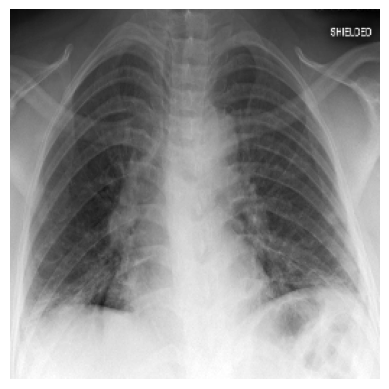

1/1 [==============================] - 0s 188ms/step
X-ray is showing Covid


In [23]:
img=cv2.imread("/content/Data/test/COVID19/COVID19(469).jpg")
img=cv2.resize(img,[256,256])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
predict_1=img.reshape(1,256,256,1)
print("Shape of Image: ",img.shape)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.show()
array_output=model.predict(predict_1)
result=array_output.argmax()
if(result==0):
  print("X-ray is Normal")
elif(result==1):
  print("X-ray is showing viral pneumonia")
else:
  print("X-ray is showing Covid")

Shape of Image:  (256, 256)


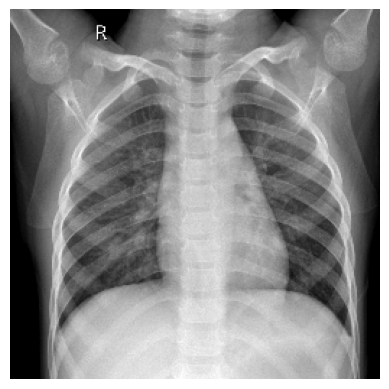

1/1 [==============================] - 0s 20ms/step
X-ray is Normal


In [24]:
img=cv2.imread("/content/Data/test/NORMAL/NORMAL(1279).jpg")
img=cv2.resize(img,[256,256])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
predict_2=img.reshape(1,256,256,1)
print("Shape of Image: ",img.shape)
plt.imshow(img,cmap="gray")
plt.axis('off')
plt.show()
array_output=model.predict(predict_2)
result=array_output.argmax()
if(result==0):
  print("X-ray is Normal")
elif(result==1):
  print("X-ray is showing viral pneumonia")
else:
  print("X-ray is showing Covid")